## Assignment: $k$ Means Clustering

## *Do two questions. - Did 1 and 2*

## **Jenny Schilling (xdj3kg)**


In [4]:
! git clone https://github.com/jennyschilling/kmc

fatal: destination path 'kmc' already exists and is not an empty directory.


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [23]:
df = pd.read_csv('./kmc/data/airbnb_hw.csv')

# rename columns
df['price'] = df['Price']
df['num_beds'] = df['Beds']
df['num_reviews'] = df['Number Of Reviews']
df['review_score'] = df['Review Scores Rating']

X = df.loc[:,['price', 'num_beds', 'num_reviews', 'review_score']]
print(X.shape)
X.describe()

# cleaning price
X['price'] = X['price'].str.replace(',', '').astype(int)
X.describe()

# cleaning beds
X['num_beds'] = X['num_beds'].fillna(1)
X.describe()

# cleaning num of reviews
# not necessary

# cleaning review scores
null_reviews = df['review_score'].isnull()
has_reviews = df['review_score'] > 0
pd.crosstab(null_reviews, has_reviews)

# check work
X = X.dropna()
X.describe()

(30478, 4)


,price,num_beds,num_reviews,review_score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [24]:
# Maxmin normalize the data and remove any nan's
Z = X.drop('price',axis=1)
scaler = MinMaxScaler()
Z_scaled = scaler.fit_transform(Z)
Z.describe()

,num_beds,num_reviews,review_score
count,22155.000000,22155.000000,22155.000000
mean,1.556985,16.505439,91.993230
std,1.043273,24.308241,8.850373
min,0.000000,1.000000,20.000000
25%,1.000000,2.000000,89.000000
50%,1.000000,7.000000,94.000000
75%,2.000000,20.000000,100.000000
max,16.000000,257.000000,100.000000


In [25]:
# Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_
Z.describe()

,num_beds,num_reviews,review_score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,1.556985,16.505439,91.993230,2.783796
std,1.043273,24.308241,8.850373,1.590920
min,0.000000,1.000000,20.000000,0.000000
25%,1.000000,2.000000,89.000000,2.000000
50%,1.000000,7.000000,94.000000,4.000000
75%,2.000000,20.000000,100.000000,4.000000
max,16.000000,257.000000,100.000000,5.000000


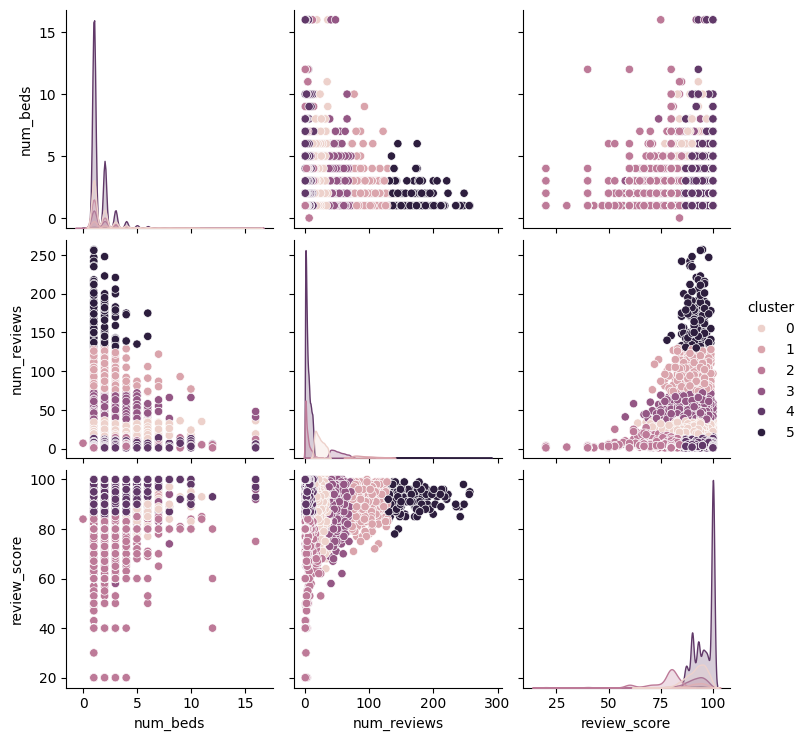

In [26]:
# Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
sns.pairplot(data=Z,hue='cluster')

In [28]:
# Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?
X['cluster'] = model.labels_
avg = X.loc[:,['price', 'cluster']]
avg = avg.groupby('cluster')
avg.describe()

price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0         4273.0  161.712380  193.531253  20.0  88.0  135.0  195.00  10000.0
1          748.0  134.442513   84.012800  27.0  80.0  110.0  165.00    875.0
2         2921.0  138.445395  160.800989  21.0  70.0  105.0  170.00   5000.0
3         1913.0  147.085729   96.057748  22.0  89.0  125.0  180.00   1500.0
4        12154.0  159.088777  137.526698  10.0  85.0  130.0  195.00   4500.0
5          146.0  126.171233   71.032519  33.0  79.0  112.5  163.75    550.0

It looks like cluster 0 has the highest rental prices, with an average of \$161.71. Close behind is cluster 4 with and average price of \$159.09 and then cluster 3 at \$147.09. Cluster 0 is likely this high due to the fact that it includes the max nightly price of \$10,000, which is an outlier as we can see from the standard deviation.

Text(0.5, 1.0, 'Scree Plot')

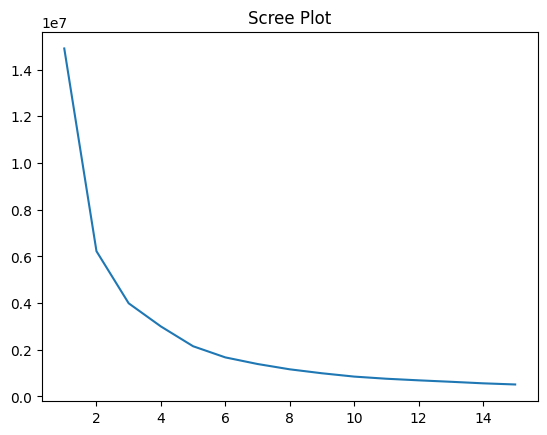

In [29]:
# Use a scree plot to pick the number of clusters and repeat steps 4 and 5.
n_clusters_max = 15
ks = np.arange(1, n_clusters_max + 1)
SSE = [KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0).fit(Z).inertia_
       for k in range(n_clusters_max)]

sns.lineplot(x=ks, y=SSE).set_title('Scree Plot')

price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0         3152.0  139.336929  157.200291  20.0  70.0  110.0  170.0   5000.0
1          870.0  133.365517   82.287392  27.0  80.0  112.0  165.0    875.0
2        14428.0  160.185195  158.747404  10.0  86.0  130.0  195.0  10000.0
3         3705.0  151.943320  106.280094  22.0  89.0  127.0  185.0   1500.0

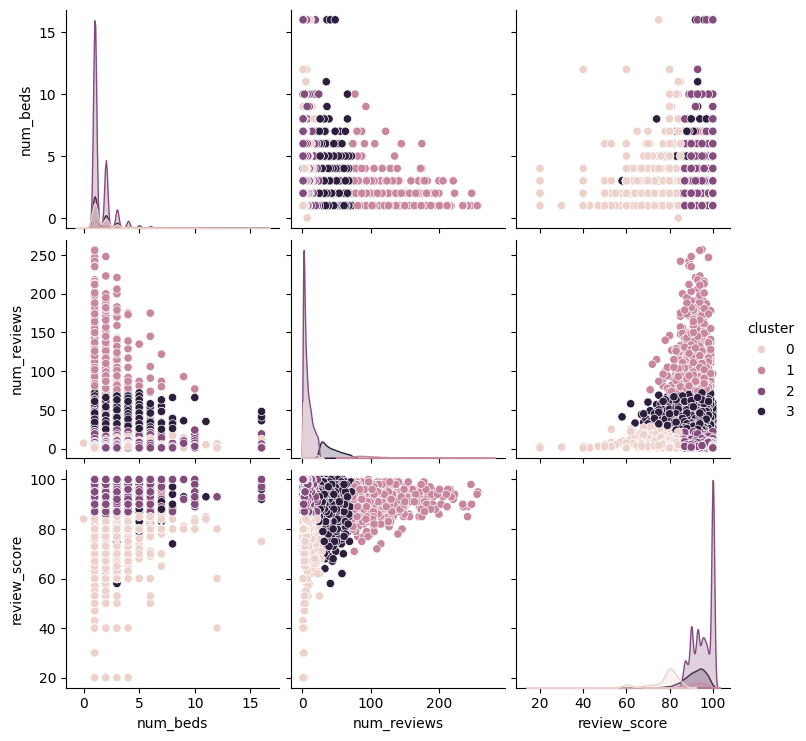

In [31]:
model = KMeans(n_clusters=4, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_
sns.pairplot(data=Z,hue='cluster')

X['cluster'] = model.labels_
avg = X.loc[:,['price', 'cluster']]
avg = avg.groupby('cluster')
avg.describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.